In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
#Reading the data from the csv file
cars_data = pd.read_csv('CarPrice_Assignment.csv')
cars_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
#Finding the shape of the data
cars_data.shape

(205, 26)

In [5]:
#Describing the data
cars_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
#Finding the information of the data
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
#Finding the null values in the dataset
cars_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
#Finding the duplicate rows in the dataset
cars_data.duplicated(subset = ['car_ID']).sum()

0

In [9]:
#Removing the id column
cars_data = cars_data.drop(['car_ID'], axis = 1)
cars_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
#Counting the cars Company wise
cars_data['CarName'].value_counts()

toyota corona         6
peugeot 504           6
toyota corolla        6
subaru dl             4
honda civic           3
                     ..
nissan dayz           1
honda civic (auto)    1
mazda glc custom l    1
renault 5 gtl         1
dodge rampage         1
Name: CarName, Length: 147, dtype: int64

In [11]:
#Removing the Car names and keeping only the company names
cars_data['CarsCompany'] = cars_data['CarName'].apply(lambda x:x.strip().split(' ')[0])
cars_data = cars_data.drop(['CarName'], axis = 1)
cars_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarsCompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [12]:
cars_data['CarsCompany'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
vw              2
maxda           2
mercury         1
vokswagen       1
Nissan          1
porcshce        1
toyouta         1
Name: CarsCompany, dtype: int64

In [13]:
#Correcting the spellings of the company names
cars_data['CarsCompany'].replace('toyouta', 'toyota', inplace = True)
cars_data['CarsCompany'].replace('Nissan', 'nissan', inplace = True)
cars_data['CarsCompany'].replace('maxda', 'mazda', inplace = True)
cars_data['CarsCompany'].replace('vokswagen', 'volkswagen', inplace = True)
cars_data['CarsCompany'].replace('vw', 'volkswagen', inplace = True)
cars_data['CarsCompany'].replace('porcshce', 'porsche', inplace = True)
#Counting the number of cars of each company
cars_data['CarsCompany'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarsCompany, dtype: int64

<AxesSubplot:xlabel='carwidth', ylabel='Density'>

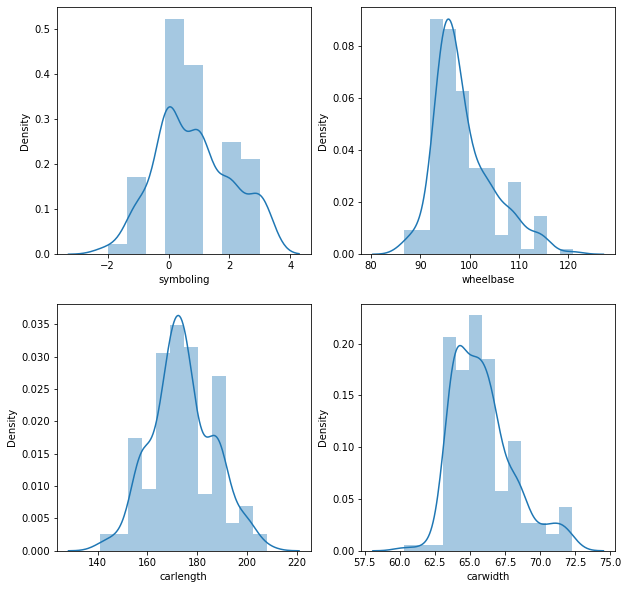

In [14]:
#Plotting vaious properties of the cars
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(cars_data['symboling'])
plt.subplot(2,2,2)
sns.distplot(cars_data['wheelbase'])
plt.subplot(2,2,3)
sns.distplot(cars_data['carlength'])
plt.subplot(2,2,4)
sns.distplot(cars_data['carwidth'])

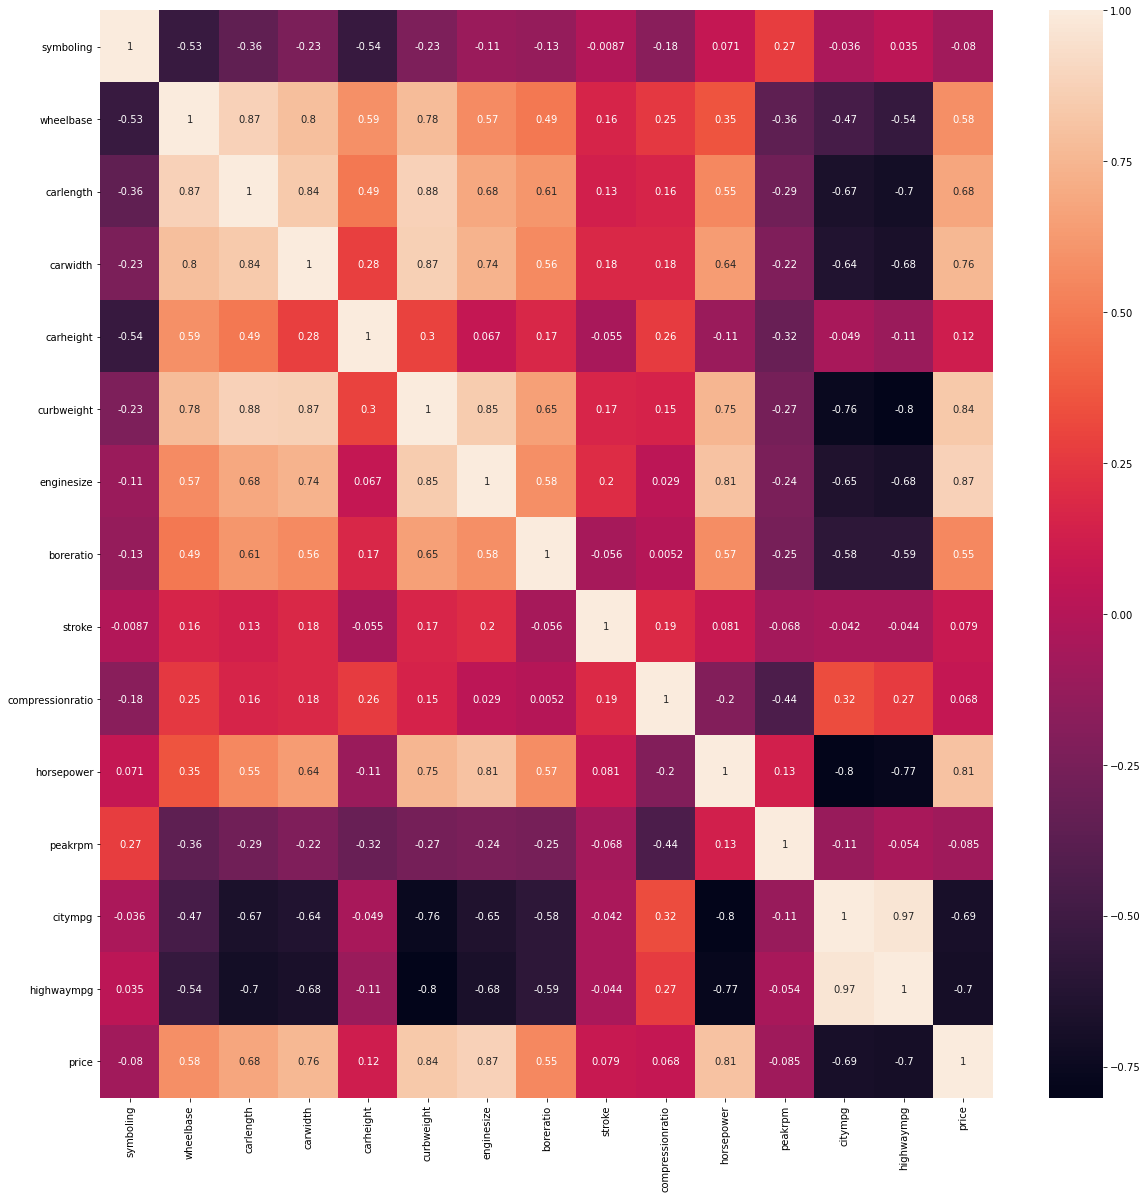

In [15]:
#Plotting the Heatmap to find the correlations
plt.figure(figsize = (20,20))
sns.heatmap(cars_data.corr(), annot = True)
plt.show()

<AxesSubplot:xlabel='CarsCompany', ylabel='price'>

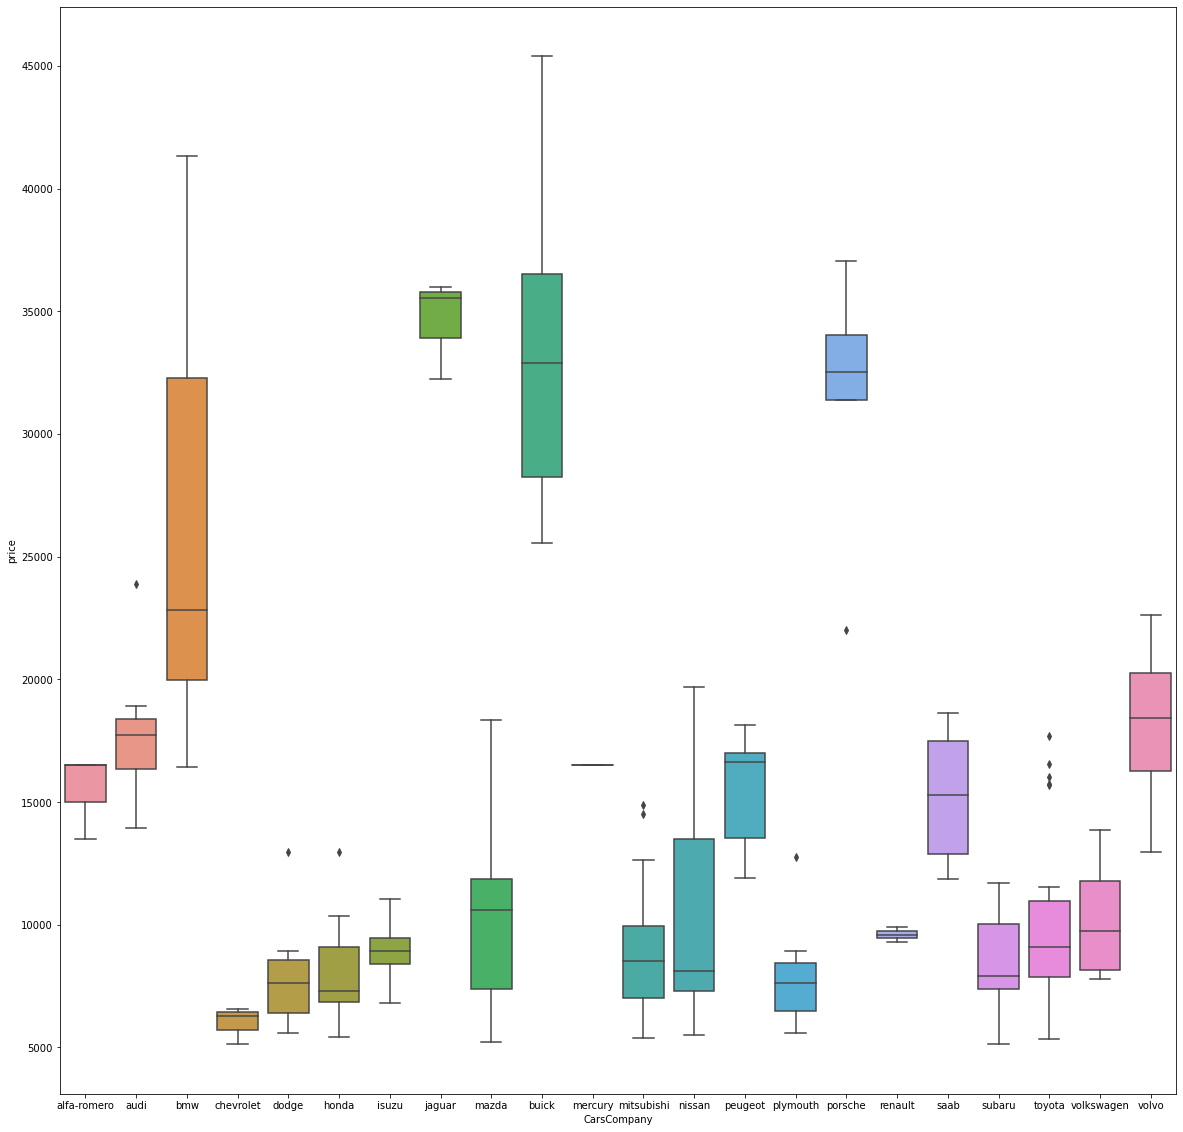

In [16]:
#Cars prices based on the Cars Companies
plt.figure(figsize = (20,20))
sns.boxplot(x = 'CarsCompany', y = 'price', data = cars_data)

In [17]:
cars_data = cars_data.drop(['doornumber', 'cylindernumber'], axis = 1)
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  enginesize        205 non-null    int64  
 13  fuelsystem        205 non-null    object 
 14  boreratio         205 non-null    float64
 15  stroke            205 non-null    float64
 16  compressionratio  205 non-null    float64
 1

In [18]:
categories = cars_data.select_dtypes(include = ['object'])
categories.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,CarsCompany
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


In [19]:
#Creating the dummy variables
dummies = pd.get_dummies(categories, drop_first = True)
cars_df = pd.concat([cars_data, dummies], axis = 1)
cars_df = cars_df.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation','enginetype', 'fuelsystem', 'CarsCompany'], axis = 1)
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   wheelbase               205 non-null    float64
 2   carlength               205 non-null    float64
 3   carwidth                205 non-null    float64
 4   carheight               205 non-null    float64
 5   curbweight              205 non-null    int64  
 6   enginesize              205 non-null    int64  
 7   boreratio               205 non-null    float64
 8   stroke                  205 non-null    float64
 9   compressionratio        205 non-null    float64
 10  horsepower              205 non-null    int64  
 11  peakrpm                 205 non-null    int64  
 12  citympg                 205 non-null    int64  
 13  highwaympg              205 non-null    int64  
 14  price                   205 non-null    fl

In [20]:
#Making the input set
X = cars_df.drop(['price'], axis = 1)
#Creating the output set
y = cars_df['price']

In [39]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [40]:
# instantiate
lm = LinearRegression()
# fit
lm.fit(X_train, y_train)
# predict 
y_pred = lm.predict(X_test)
# metrics
from sklearn.metrics import r2_score
print(r2_score(y_true=y_test, y_pred=y_pred))

0.9188472898532467


In [41]:
# RFE with 15 features
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe_15 = RFE(lm, 15)

# fit with 15 features
rfe_15.fit(X_train, y_train)

# Printing the boolean results
print(rfe_15.support_)           
print(rfe_15.ranking_)  

[False False False False False False False False False False False False
 False False False False  True False False False  True False  True False
  True False  True False  True False  True False False False False False
 False  True  True False False False  True  True False False False False
  True False  True False  True  True False False False]
[34 29 31  6 28 39 30 21 27 13 37 40 38 32 11  8  1  2  5  3  1 35  1 36
  1 33  1  7  1 24  1 12 42 23 26 41 18  1  1 22 17 16  1  1 10 43  9 19
  1 20  1  4  1  1 15 14 25]


In [42]:
# making predictions using rfe model
y_pred = rfe_15.predict(X_test)

# r-squared
print(r2_score(y_test, y_pred))

0.7642408874669062


In [43]:
# RFE with 6 features
from sklearn.feature_selection import RFE

# RFE with 6 features
lm = LinearRegression()
rfe_6 = RFE(lm, 6)

# fit with 6 features
rfe_6.fit(X_train, y_train)

# predict
y_pred = rfe_6.predict(X_test)

# r-squared
print(r2_score(y_test, y_pred))

0.7049098734402879


In [44]:
# import statsmodels
import statsmodels.api as sm  

# subset the features selected by rfe_15
col_15 = X_train.columns[rfe_15.support_]

# subsetting training data for 15 selected columns
X_train_rfe_15 = X_train[col_15]

# add a constant to the model
X_train_rfe_15 = sm.add_constant(X_train_rfe_15)
X_train_rfe_15.head()

,const,carbody_hardtop,drivewheel_fwd,enginelocation_rear,enginetype_l,enginetype_ohcf,enginetype_rotor,fuelsystem_4bbl,CarsCompany_bmw,CarsCompany_buick,CarsCompany_isuzu,CarsCompany_jaguar,CarsCompany_peugeot,CarsCompany_porsche,CarsCompany_saab,CarsCompany_subaru
122,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
125,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
166,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
# fitting the model with 15 variables
lm_15 = sm.OLS(y_train, X_train_rfe_15).fit()   
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     31.72
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           7.13e-35
Time:                        23:51:44   Log-Likelihood:                -1377.0
No. Observations:                 143   AIC:                             2784.
Df Residuals:                     128   BIC:                             2829.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.505e+04    

In [46]:
# making predictions using rfe_15 sm model
X_test_rfe_15 = X_test[col_15]


# # Adding a constant variable 
X_test_rfe_15 = sm.add_constant(X_test_rfe_15, has_constant='add')
X_test_rfe_15.info()


# # Making predictions
y_pred = lm_15.predict(X_test_rfe_15)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                62 non-null     float64
 1   carbody_hardtop      62 non-null     uint8  
 2   drivewheel_fwd       62 non-null     uint8  
 3   enginelocation_rear  62 non-null     uint8  
 4   enginetype_l         62 non-null     uint8  
 5   enginetype_ohcf      62 non-null     uint8  
 6   enginetype_rotor     62 non-null     uint8  
 7   fuelsystem_4bbl      62 non-null     uint8  
 8   CarsCompany_bmw      62 non-null     uint8  
 9   CarsCompany_buick    62 non-null     uint8  
 10  CarsCompany_isuzu    62 non-null     uint8  
 11  CarsCompany_jaguar   62 non-null     uint8  
 12  CarsCompany_peugeot  62 non-null     uint8  
 13  CarsCompany_porsche  62 non-null     uint8  
 14  CarsCompany_saab     62 non-null     uint8  
 15  CarsCompany_subaru   62 non-null     ui

In [47]:
# r-squared
r2_score(y_test, y_pred)

0.7642408874669054

In [48]:
# subset the features selected by rfe_6
col_6 = X_train.columns[rfe_6.support_]

# subsetting training data for 6 selected columns
X_train_rfe_6 = X_train[col_6]

# add a constant to the model
X_train_rfe_6 = sm.add_constant(X_train_rfe_6)


# fitting the model with 6 variables
lm_6 = sm.OLS(y_train, X_train_rfe_6).fit()   
print(lm_6.summary())


# making predictions using rfe_6 sm model
X_test_rfe_6 = X_test[col_6]


# Adding a constant  
X_test_rfe_6 = sm.add_constant(X_test_rfe_6, has_constant='add')
X_test_rfe_6.info()


# # Making predictions
y_pred = lm_6.predict(X_test_rfe_6)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     42.77
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           5.15e-29
Time:                        23:53:25   Log-Likelihood:                -1408.3
No. Observations:                 143   AIC:                             2831.
Df Residuals:                     136   BIC:                             2851.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.068e+04    

In [49]:
# r2_score for 6 variables
r2_score(y_test, y_pred)

0.7049098734402888

In [50]:
n_features_list = list(range(4, 20))
adjusted_r2 = []
r2 = []
test_r2 = []

for n_features in range(4, 20):

    # RFE with n features
    lm = LinearRegression()

    # specify number of features
    rfe_n = RFE(lm, n_features)

    # fit with n features
    rfe_n.fit(X_train, y_train)

    # subset the features selected by rfe_6
    col_n = X_train.columns[rfe_n.support_]

    # subsetting training data for 6 selected columns
    X_train_rfe_n = X_train[col_n]

    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)


    # fitting the model with 6 variables
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    adjusted_r2.append(lm_n.rsquared_adj)
    r2.append(lm_n.rsquared)
    
    
    # making predictions using rfe_15 sm model
    X_test_rfe_n = X_test[col_n]


    # # Adding a constant variable 
    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')



    # # Making predictions
    y_pred = lm_n.predict(X_test_rfe_n)
    
    test_r2.append(r2_score(y_test, y_pred))

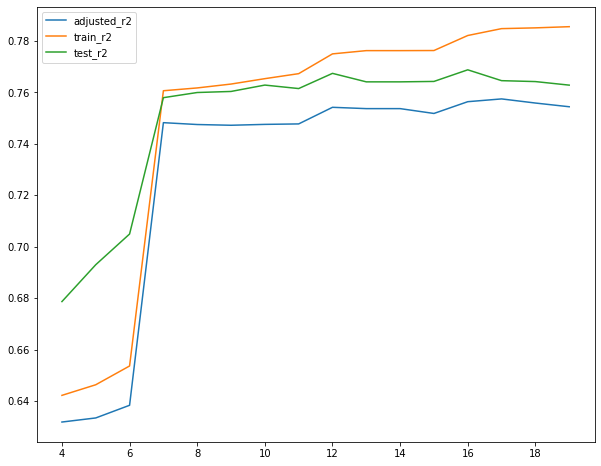

In [51]:
# plotting adjusted_r2 against n_features
plt.figure(figsize=(10, 8))
plt.plot(n_features_list, adjusted_r2, label="adjusted_r2")
plt.plot(n_features_list, r2, label="train_r2")
plt.plot(n_features_list, test_r2, label="test_r2")
plt.legend(loc='upper left')
plt.show()

In [52]:
# RFE with n features
lm = LinearRegression()

n_features = 6

# specify number of features
rfe_n = RFE(lm, n_features)

# fit with n features
rfe_n.fit(X_train, y_train)

# subset the features selected by rfe_6
col_n = X_train.columns[rfe_n.support_]

# subsetting training data for 6 selected columns
X_train_rfe_n = X_train[col_n]

# add a constant to the model
X_train_rfe_n = sm.add_constant(X_train_rfe_n)


# fitting the model with 6 variables
lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
adjusted_r2.append(lm_n.rsquared_adj)
r2.append(lm_n.rsquared)


# making predictions using rfe_15 sm model
X_test_rfe_n = X_test[col_n]


# # Adding a constant variable 
X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')



# # Making predictions
y_pred = lm_n.predict(X_test_rfe_n)

test_r2.append(r2_score(y_test, y_pred))

In [53]:
# summary
lm_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     42.77
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           5.15e-29
Time:                        23:57:49   Log-Likelihood:                -1408.3
No. Observations:                 143   AIC:                             2831.
Df Residuals:                     136   BIC:                             2851.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.068e+04    423.349     25.233      0.000    9845.129    1.15e+04
enginelocation_rear  7318.7500   5750.378      1.273      0.205   -4052.973    1.87e+04
CarsCompany_bmw       1.62e+04   1962.987      8.250      0.000    1.23e+04    2.01e+04
CarsCompany_buick    2.025e+04   2141.994      9.452      0.000     1.6e+04    2.45e+04
CarsCompany_jaguar   2.392e+04   2743.613      8.718      0.000    1.85e+04    2.93e+04
CarsCompany_porsche  1.603e+04   3346.865      4.789      0.000    9408.294    2.26e+04
CarsCompany_saab     4644.3401   2743.613      1.693      0.093    -781.322    1.01e+04
==============================================================================
Omnibus:                       17.704   Durbin-Watson:                   2.313
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.414
Skew:                           0.907   Prob(JB):                     3.69e-05
Kurtosis:                       3.368   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# results 
r2_score(y_test, y_pred)


0.7049098734402888